# Introduction

Population models are used to predict variables such as the likelihood of survival, growth rate, and the population size within a certain species. Although there are many factors that ultimately play into the evolution of a species, some of these could be unpredictable. We will use only factors that are given, easibly attainable, or interchangeable. This project will focus on the study of mayflies, an insect species, and how their population will change over time. We will study the change in population of the species. The variables being altered and examined will be initial population, growth factor, and number of years since inception. Their population for each year will depend on the population that existed in the previous year. They will also have a maximum size that their population is possible of reaching due to environmental constraints and at which point their growth rate will reach zero.


The equation below will model the current and future populations based off of $y_{n-1}$, the previous year's population, and b, which will represent the growth factor.

$$ y_n = b(1-y_{n-1})y_{n-1} $$

Based off of this equation, our y values must be greater than 0 and less than 1. This is because inside of the parenthesis if we use 1 our equation will go to zero and if we use 0 as our y then the last term of the function will also cause the equation to go to zero. Since it isn't actually possible for the population to deliberately be a value between 0 and 1, this value will be represented in thousands to better display a real world example.
$$ 0<y<1 $$
In the same regard, our b value must remain between 0 and 4.
$$ 0<b<4 $$
Different observations of the population trends will be deducted from population graphs and bifurcation models.

### The Mayfly Model
A function must first be created in order to represent the change in population of the species over a given time period.

In [91]:
def mayfly_model(growth_factor,init_pop,n): #names the function and establishes 3 variables
    population = [init_pop]  #initialize the population list with the initial population
    for i in range(1,n+1): #sets the range for year 1 through n+1
        y_n = growth_factor * (1 - population[i-1]) * population[i-1]  #calculate the population at time i using the recurrence relation
        population.append(y_n)  #add the calculated population to the list
    return population #saves the list for the first n populations

A list of the first 10 years and their respective population in thousands.

In [92]:
population = mayfly_model(1.5,0.5,10) #population references the mayfly model with the 3 varibales
print(population) #prints the list of the first n years

[0.5, 0.375, 0.3515625, 0.341949462890625, 0.3375300415791571, 0.3354052689160944, 0.33436286174912516, 0.3338465076480908, 0.3335895254688961, 0.3334613309494992, 0.3333973075663317]


### Plotting the Mayfly Model
A graph of the population over time will show any trends that could arise.

In [93]:
import matplotlib.pyplot as plt #imports a graphing module

In [94]:
def plot_model(init_pop,growth_factor,n): #names the function and establishes 3 variables
    x = [i for i in range(11)] #sets the range for x values 
    y = mayfly_model(growth_factor,init_pop,n) #y values will be graphed referencing the mayfly function
    plt.figure(figsize=[3,2]) #sets the the size of the plot as a 3x2
    plt.plot(x,y) #plots both the x values and y values
    plt.title('Graph of $P(t)$ with growth factor {} and initial population {}'.format(growth_factor,init_pop)) #labels the title of the graph
    plt.xlabel('Time in years') #labels the x axis
    plt.ylabel('Population in thousands') #labels the y axis

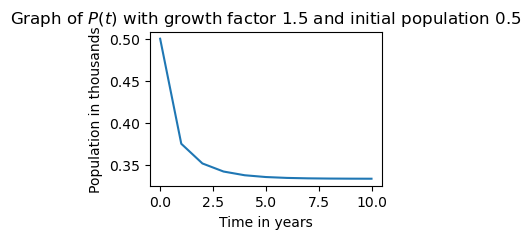

In [95]:
plot_model(0.5,1.5,10) #creates a plot with respect to initial population, growth factor, and time
plt.show() #hides unnecessary code above graph

Given the growth factor of 1.5 and an initial population of 0.5, we can see that over the first 10 years the population will exponentially decrease.

We can explore if this trend will differ with other exploratory variables.

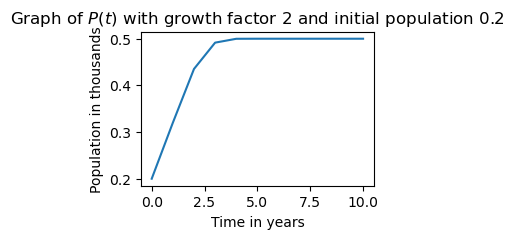

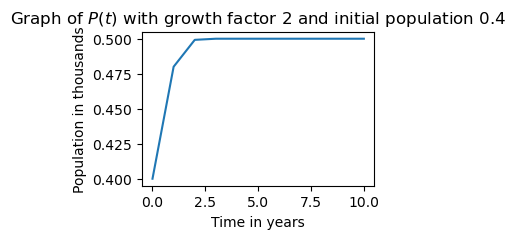

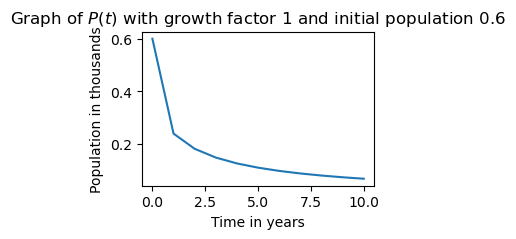

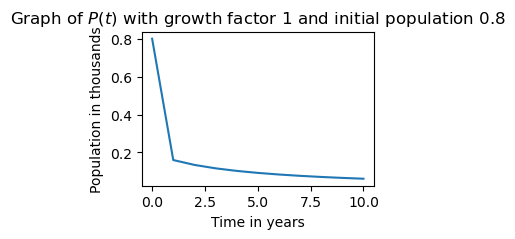

In [96]:
y1 = plot_model(0.2,2,10) #creates plot 1 with respect to initial population, growth factor, and time
y2 = plot_model(0.4,2,10) #creates plot 2 with respect to initial population, growth factor, and time
y3 = plot_model(0.6,1,10) #creates plot 3 with respect to initial population, growth factor, and time
y4 = plot_model(0.8,1,10) #creates plot 4 with respect to initial population, growth factor, and time

Based on the above graphs, the exponential decrease trend does not hold true for other potential exploratory variables.

The first two graphs show an exponential increase in population over time whereas the second two show the opposite. Since none of these constants are held contsant throughout, we can further look into where this change is occuring.

### Plot of multiple growth factors for a single initial population

One way of viewing where these changes may be occruing is by holding the inital population constant and applying several growth factor within the acceptable range of 0 to 4.

It will be more convenient and easier to differentiate these graphs on a larger figure scale becasue there will be multiple lines plotted toegther as opposed to just one population trend per graph.

In [97]:
def plot_models(init_pop,growth_factor,n): #names the function which will plot more than one trend line
    plt.figure(figsize=[6,4]) #sets the size of the graph as a 4x3
    for gf in growth_factor: #function will loop through a list of growth factors
        x = [n for n in range(11)] #sets the range of x
        y = mayfly_model(gf,init_pop,n) #y values will reference the mayfly model with each growth factor
        plt.plot(x,y,label='growth factor {}'.format(gf)) #plots the x and y values and adds a label for the legend
    plt.title('Graph of $P(t)$ with initial population {} and growth factors {}'.format(init_pop,growth_factor)) #labels the title of the graph
    plt.xlabel('Time in years') #labels the x axis
    plt.ylabel('Population in thousands') #labels the y axis
    plt.legend() #adds a legend to differentiate each growth factor

Each graph will consist of a different initial population but each will have growth factors every 0.5 from 0 to 4 for a total of 9 slopes.

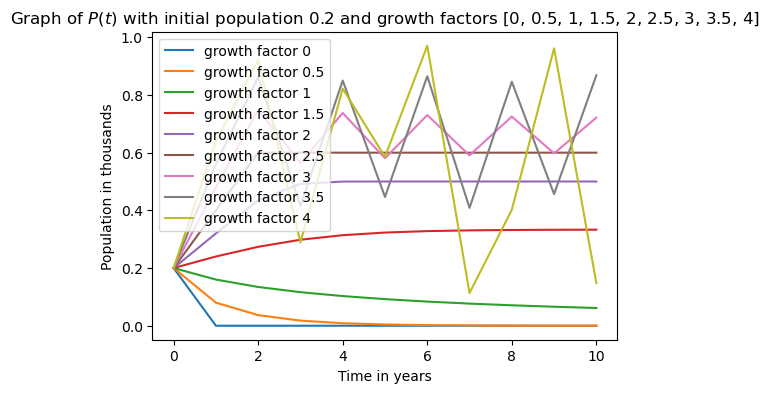

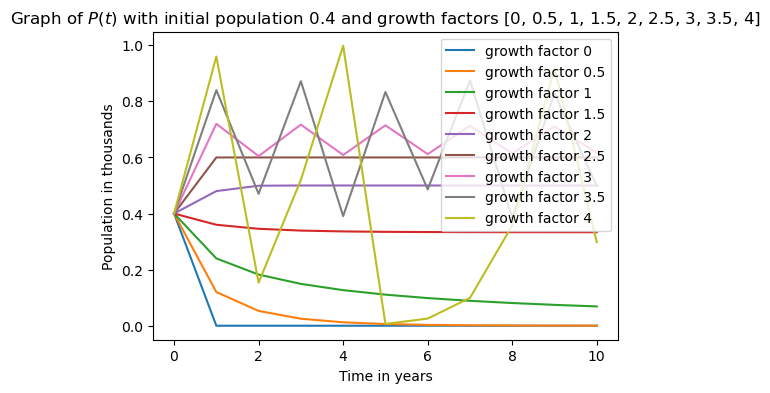

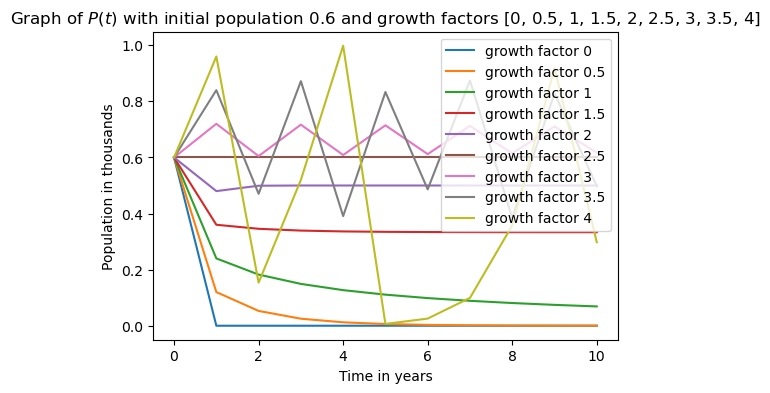

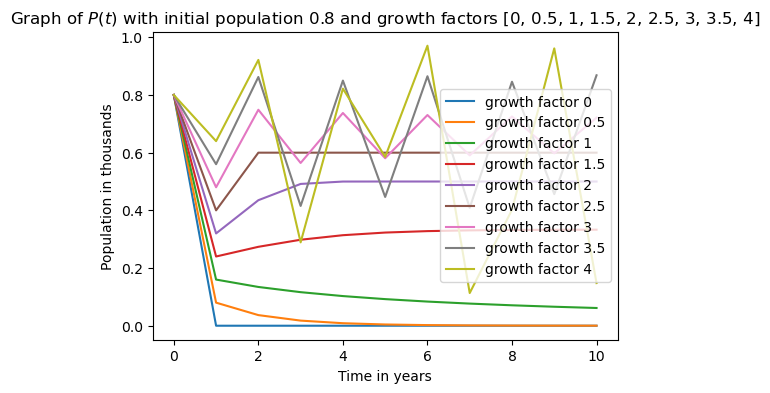

In [98]:
y1 = plot_models(0.2,[0,0.5,1,1.5,2,2.5,3,3.5,4],10) #creates plot 1 with respect to initial population, a list of growth factors, and time
y2 = plot_models(0.4,[0,0.5,1,1.5,2,2.5,3,3.5,4],10) #creates plot 2 with respect to initial population, a list of growth factors, and time
y3 = plot_models(0.6,[0,0.5,1,1.5,2,2.5,3,3.5,4],10) #creates plot 3 with respect to initial population, a list of growth factors, and time
y4 = plot_models(0.8,[0,0.5,1,1.5,2,2.5,3,3.5,4],10) #creates plot 4 with respect to initial population, a list of growth factors, and time

From these graphs we can see similarities and differences in the trends. One trend that is consistent through all is that growth factors 3, 3.5, and 4 all produce an oscillating slope. We also notice that as the initial population size is increased, the amount of slopes that begin my increasing, decrease. For example, in the first graph we can see that the 6 highest growth factors out of the 9 total begin by increasing population. The second graph follows this by having the 5 highest growth factors begin with an increasing slope, the third graph having the 3 highest increase, until we reach the 4th graph where none of the slopes beign by increasing. The growth factor of 0 for all the graphs sees the population reduce to 0 after the first year and remaining there. The only other growth factor that sees the population reduce to 0 within the first 10 years is the growth factor of 0.5 which occurs on all 4 graphs.

### Plot of multiple initial populations for a single growth factor

Now, instead of exploring mutiple growth factors on one initial population, we will do the opposite by providing a list of initial populations and holding the growth factor constant.

In [99]:
def plot_models2(init_pop,growth_factor,n): #names a function that will graph multiple trend lines
    plt.figure(figsize=[7,3]) #sets the size of the graph as a 4x3
    for y0 in init_pop: #function will loop through a list of initial populations
        x = [n for n in range(11)] #sets the range of x values
        y = mayfly_model(growth_factor,y0,n) #y values will reference the mayfly model with each initial population
        plt.plot(x,y,label='initial population {}'.format(y0)) #plots the x and y values and adds a label for initial population
    plt.title('Graph of $P(t)$ with initial population {} and growth factor {}'.format(init_pop,growth_factor)) #labels the title of the graph
    plt.xlabel('Time in years') #labels the x axis
    plt.ylabel('Population in thousands') #labels the y axis
    plt.legend() #adds a legend to the graph for each initial population

Each graph will consist of a different growth factor but each will have initial populations every 0.1 from 0.1 to 1 for a total of 11 slopes. We will not include 0 and 1 as initial populations since no matter the growth factor, the population will always go to 0 after year 1 and stay there.

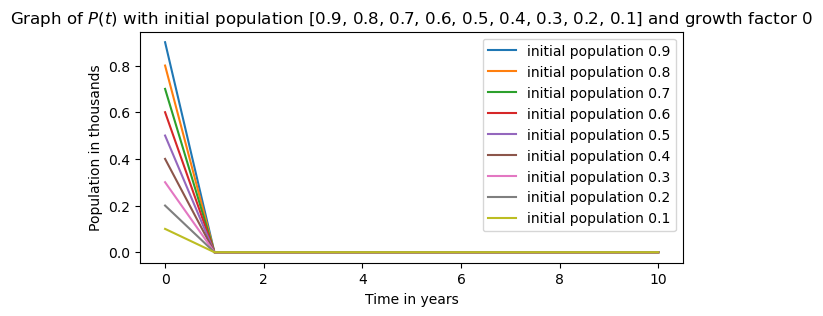

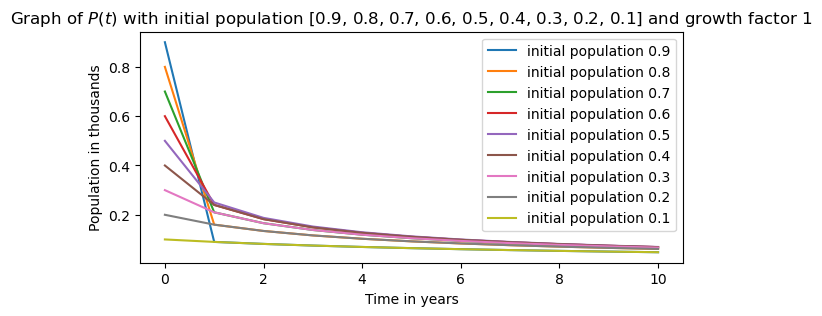

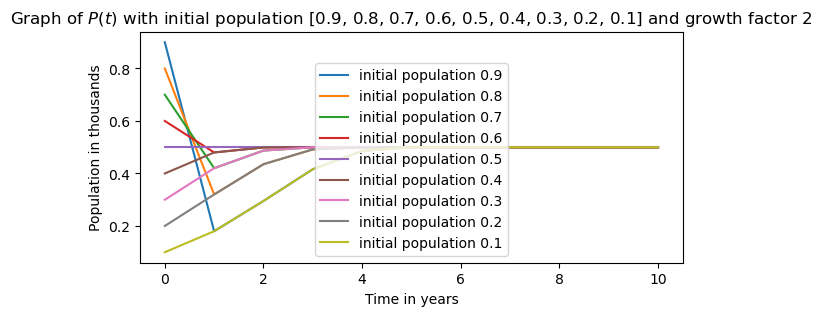

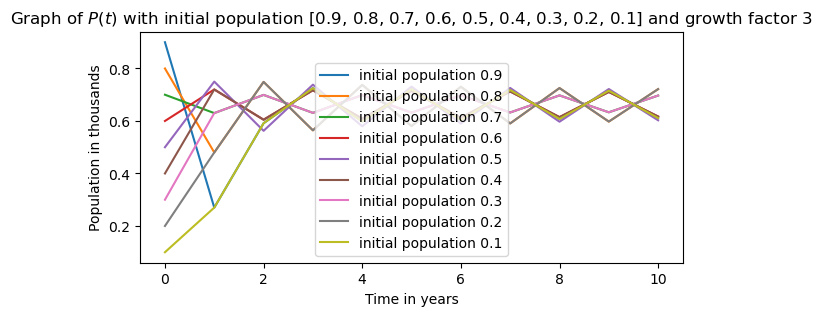

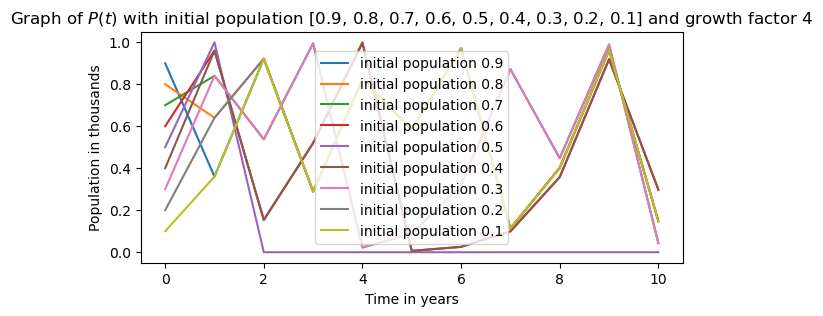

In [100]:
y1 = plot_models2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],0,10) #creates plot 1 with respect to a list of initial populations, growth factor, and time
y2 = plot_models2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],1,10) #creates plot 2 with respect to a list of initial populations, growth factor, and time
y3 = plot_models2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],2,10) #creates plot 3 with respect to a list of initial populations, growth factor, and time
y4 = plot_models2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],3,10) #creates plot 4 with respect to a list of initial populations, growth factor, and time
y5 = plot_models2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],4,10) #creates plot 5 with respect to a list of initial populations, growth factor, and time

We first notice that first graph is not very important because with a growth factor of 0 after 1 year the population will go to 0 and stay there. The graph with a growth factor of 1 sees all the populations decrease raidly after the first year and then slowly reach an asymptote around 0. Growth factor 2 has all the initial populations settle evenly at 0.5, while growth factor 3 has all the inital populations settle between about 0.6 and 0.75 with continuous oscillation. The graph of growth factor 4 is where the trends because hectic. We notice much more extreme oscillation and have inital population 0.5 as the only population to go to 0. Overall, as the growth factor is increased, we can expect to see an increase in the number of higher populations but also an increase in difference in population from one year to the next. 

## Bifurcation Model
A bifurcation model is a method that studies continuous systems. A population model such as the one being studied, is an example a continuous system. This is because a continuous system is one in which the state variable(s) change continuously over time. Another example of this would be the flow of water over a dam. Instead of plotting population over time in years like we previously studied, this method will observe population over growth rate. The initial population and number of years since inception will be the independent variables since they will be altered to observe changes. The growth rate is dependent and we will not be changing these values but instead studying their trends based off of the graphs.

In [101]:
def bifurcation_gf(init_pop,n): #names the functions with 2 variables, initial population and time
    plt.figure(figsize=[3,2]) #sets the size of the graph
    x = [i/25 for i in range(101)] #the x values will be broken down into a function that contains 100 values between 0 and 4
    y = [mayfly_model(growth_factor,init_pop,n).pop(-1) for growth_factor in x] #y values will reference the mayfly model but will pop the last value 
    plt.plot(x,y) #plots the x and y values
    plt.title('Bifurcation Graph with initital population {} after {} years'.format(init_pop,n)) #labels the title of the graph
    plt.xlabel('Growth Rate') #labels the x axis
    plt.ylabel('Population in Thousands') #labels the y axis
    plt.show() #hides unnecessary code above graph

An example of a bifuraction models that exist within the mayfly species.

#### Bifurcation models of multiple initial populations at the 10th year

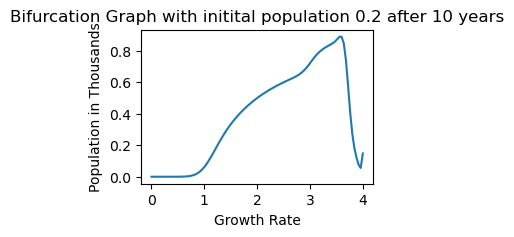

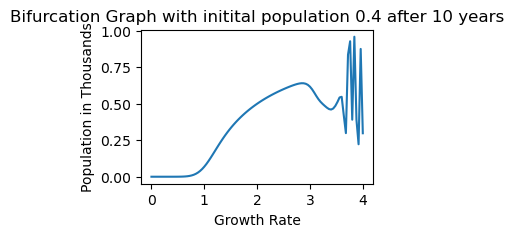

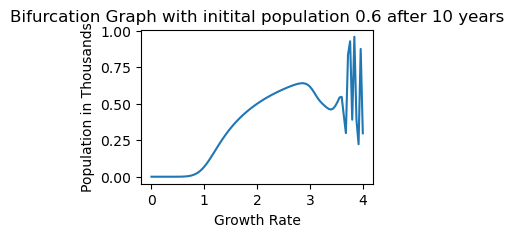

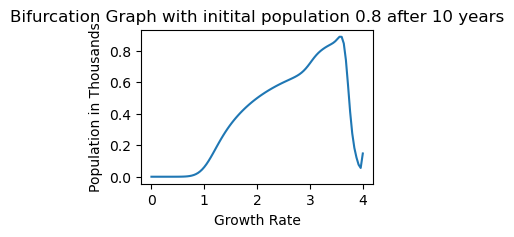

In [148]:
y1 = bifurcation_gf(0.2,10) #creates plot 1 with respect to initial population, and time
y2 = bifurcation_gf(0.4,10) #creates plot 2 with respect to initial population, and time
y3 = bifurcation_gf(0.6,10) #creates plot 3 with respect to initial population, and time
y4 = bifurcation_gf(0.8,10) #creates plot 4 with respect to initial population, and time

We can note that the graph of the 0.2 and 0.8 population are the same and the population of 0.4 and 0.6 are the same.

#### Bifurcation models of multiple initial populations at the 100th year

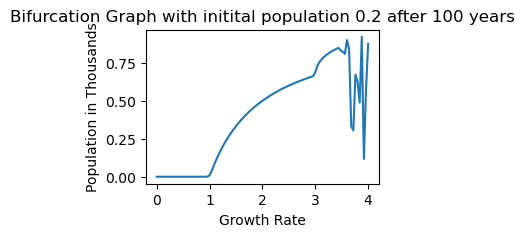

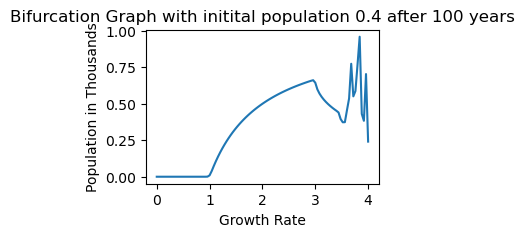

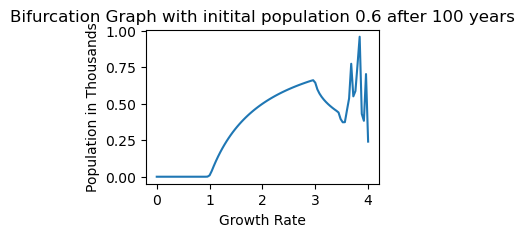

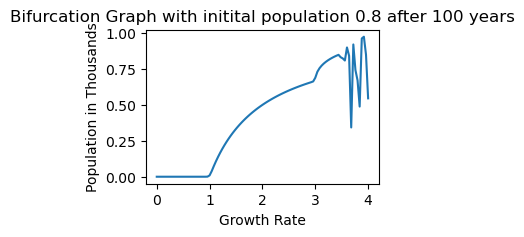

In [149]:
y1 = bifurcation_gf(0.2,100) #creates plot 1 with respect to initial population, and time
y2 = bifurcation_gf(0.4,100) #creates plot 2 with respect to initial population, and time
y3 = bifurcation_gf(0.6,100) #creates plot 3 with respect to initial population, and time
y4 = bifurcation_gf(0.8,100) #creates plot 4 with respect to initial population, and time

There is much more variation in the graphs in comparison to the 10th year graphs. There is more oscillation particularly in the 0.2 and 0.8 initial population. We also notice that the inital population of 0.4 and 0.6 have the same graph again.

### Studying the bifurcation model with multiple initial populations

The bifurcation model will show how the population changes as growth rate increases at a given period in time. We will study the bifurcation models after year 10, 100, and 1,000.

#### Bifurcation Model after 10 years with mutiple initial populations

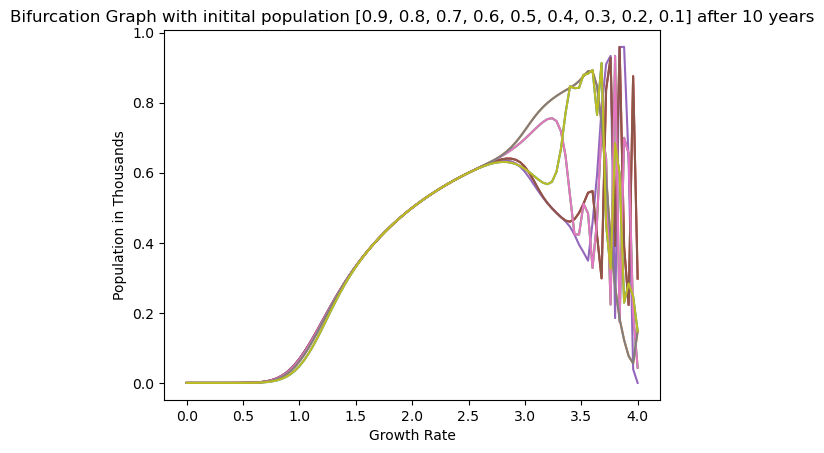

In [98]:
bifurcation_gfs([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],10) #calls the function with a list of initial populations and 10 as the years
plt.show() #hides unnecessary code above graph

#### Bifurcation Model after 100 years with mutiple initial populations

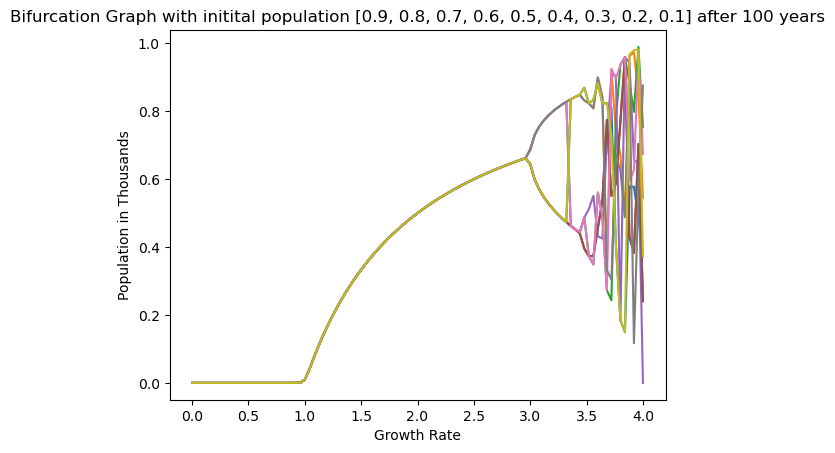

In [99]:
bifurcation_gfs([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],100) #calls the function with a list of initial populations and 100 as the years
plt.show() #hides unnecessary code above graph

#### Bifurcation Model after 1,000 years with mutiple initial populations

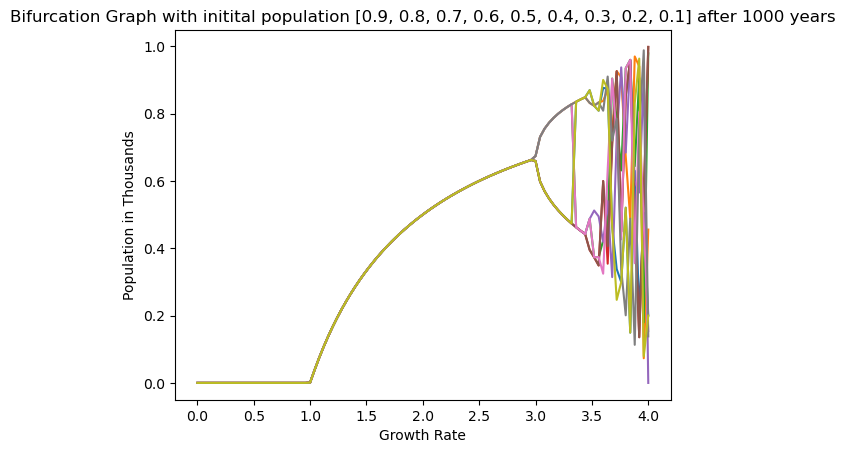

In [56]:
bifurcation_gfs([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],1000) #calls the function with a list of initial populations and 1000 as the years
plt.show() #hides unnecessary code above graph

For all of the models, the population appears to remain at 0 for growth factors 0 through 1. The first graph starts to increase right before it reaches a growth factor of 1 but for the next 2 graphs the population is strictly 0 until growth factor reaches 1. 

For growth factors 1 through about 3, we notice a steady concave down, increasing function. Graph one appears to diverge a little before a growth factor of 3 but all 3 graphs appear to have a similar pattern to them. Each of the 9 slopes have almost identical pathways up until around the area of a 3 growth factor. Much of the data after this point is indecipherable but we can take note of the oscillating pattern that takes mold for each of the slopes. The variance in population increases as we approach a max growth factor of 4. 

#### Examining the first occurance of divergence

In [141]:
def bifurcation_gfs_change(init_pop,n): #names the function with 2 variables, initial population and time
    for y0 in init_pop: #loops through initial populations
        x = [(i/1000)+2.4 for i in range(1075)] #dvides the x axis into many smaller sections to view a tighter area of the previous graph
        y = [mayfly_model(growth_factor,y0,n).pop(-1) for growth_factor in x] #y values references the last values of the mayfly model
        plt.plot(x,y) #plots with respect to x and y values
        plt.title('Bifurcation Graph with initital population {} after {} years, zoomed in'.format(init_pop,n)) #labels the title of the graph
        plt.xlabel('Growth Rate') #labels the x axis
        plt.ylabel('Population in thousands') #labels the y axis

To view the area where the bifurcation of 10 years first diverges we will zoom into a smaller section of the graph. 

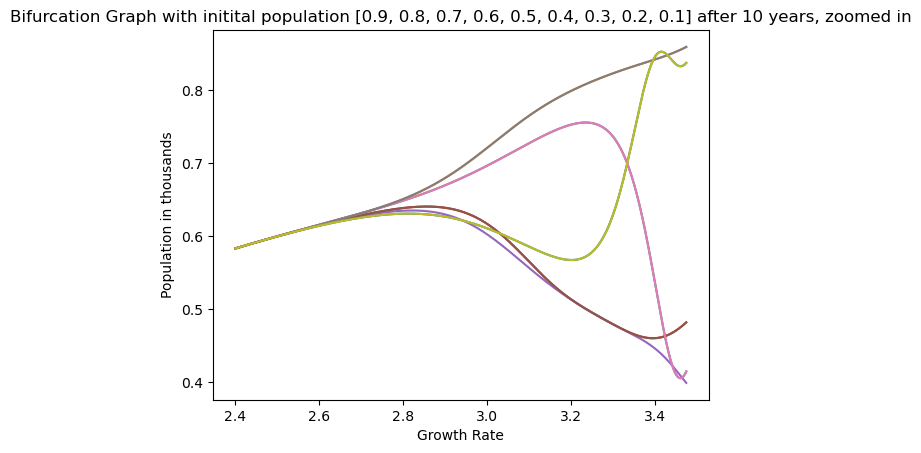

In [150]:
bifurcation_gfs_change([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],10) #creates a plot with respect to a list of initial populations, and time

For each of the slopes we see the populations either split up or down at about a growth factor 2.7.

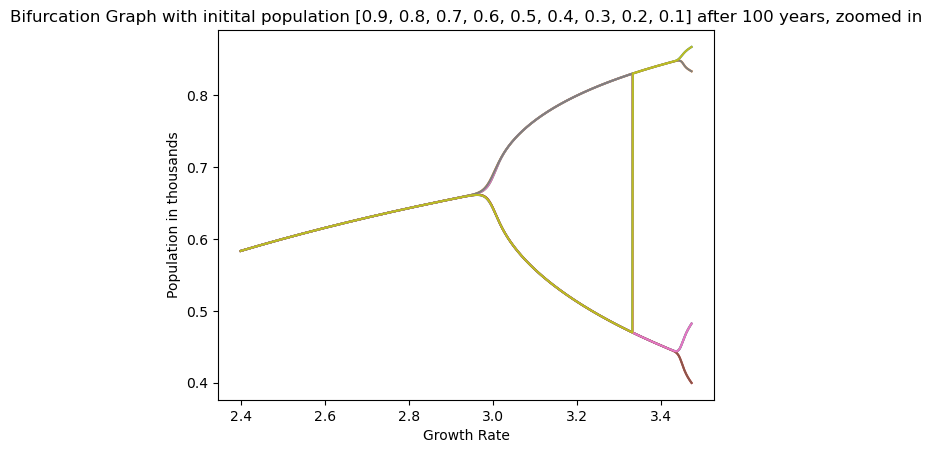

In [143]:
bifurcation_gfs_change([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],100) #creates a plot with respect to a list of initial populations, and time

For the graph of 100 years, this divergence occurs much closer to 3 which we had noted earlier. We also notice the 2nd significant divergence occurs right after a growth factor of 3.4.

#### Right end of bifurcation model zoomed in
For emphasis on viewing the oscillation that occurs as we approach a growth factor of 4.

In [151]:
def bifurcation_gfs_change2(init_pop,n): #names the function with 2 variables, initial population and time
    for y0 in init_pop: #loops through initial populations
        x = [(i/100)+3.4 for i in range(101)] #dvides the x axis into many smaller sections to view a tighter area of the previous graph
        y = [mayfly_model(growth_factor,y0,n).pop(-1) for growth_factor in x] #y values references the last values of the mayfly model
        plt.plot(x,y) #plots with respect to x and y values
        plt.title('Bifurcation Graph with initital population {} after {} years, zoomed in'.format(init_pop,n)) #labels the title of the graph
        plt.xlabel('Growth Rate') #labels the x axis
        plt.ylabel('Population in thousands') #labels the y axis

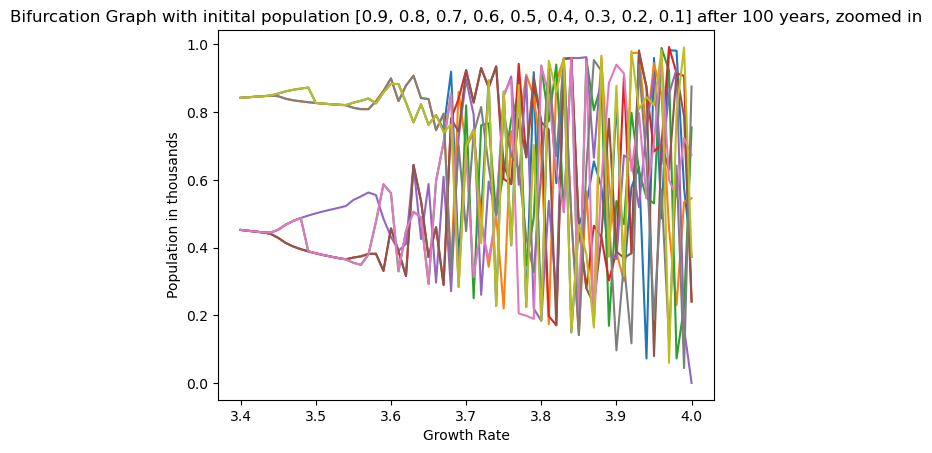

In [154]:
bifurcation_gfs_change2([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],100) #creates a plot with respect to a list of initial populations, and time

The pattern of these slopes isn't necessarily symmetrical but we notice that the minimum and maximum population values follow a strict imaginary slope on both the top and bottom.

## Conclusion

The mayfly species model represents one way in which a continuous system performs over time. In this regard we have studied the behaviors of altering initial population, growth factor, and time since inception of the particular population. Between both the original mayfly model graphs and the bifurcation models we can conclude that as the growth factor increases, specifically 3 through 4, the variance in population increases. For growth factors below 3, we will typically see the population settle around a steady value regardless of the initial population. The closer to 4 the growth factor reaches, the less the population settles at a specific value. A growth factor must be greater than 1 for any particular initial population to increase at any point over time. For growth factors 1 and below, there is not a single initial population that experiences an increase in population. The splitting that is evident in the bifurcation models is called a period-doubling cascade. It exists in an infinite sequence of period-doubling bifurcations which includes the mayfly model. These cascades are a typical design by which such dynamical systems develop chaos. This concept develops when there is a minor altercation in a system's parameters which cause a new periodic trajectory to resolve from an existing periodic trajectory. The new trajetory will have double the period of the original. Hence the name, doubled period, it will take twice as long (or double the iterations) for the numerical values encountered by the continuous system to repeat themselves. The graphs of the bifurcation model when extreme osciallilation occurs is the visual representation this splitting. Without information regarding outside factors that affect population models, the models produced in this project are strong indicators of how a species will perform when an environment has a maximum capacity and references the previous year's population. 